In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\Users\whois\AppData\Local\Temp\ipykernel_18920\409490224.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
california_housing_data = fetch_california_housing()
# exp_data = pd.DataFrame(california_housing_data.data, columns = california_housing_data.feature_names)
# exp_data
data_target = pd.DataFrame(california_housing_data["target"], columns = ["target"])

data_exp = pd.DataFrame(california_housing_data["data"], columns = california_housing_data["feature_names"])
data_exp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
df = pd.concat([data_target, data_exp], axis = 1)
df

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
df.to_csv("../csv/df.csv")
df = pd.read_csv("../csv/df.csv")

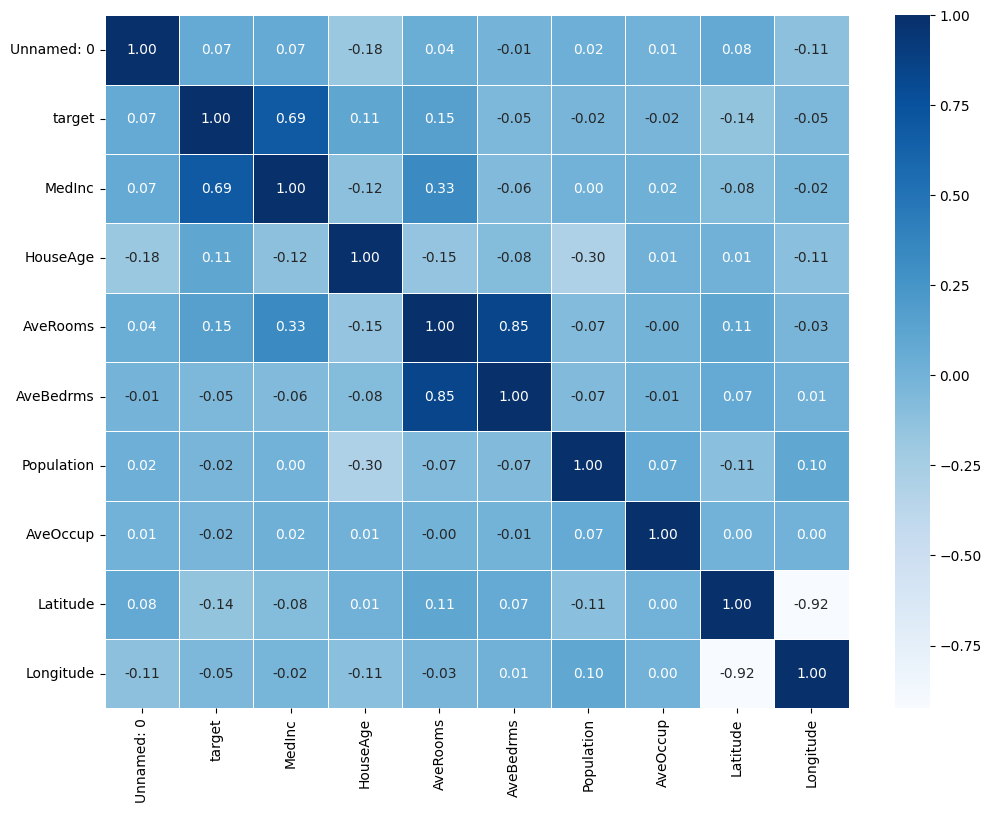

In [5]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', fmt = '.2f', linewidth = .5)
plt.savefig ("heatmap.png")

In [6]:
df.isnull().sum()

Unnamed: 0    0
target        0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

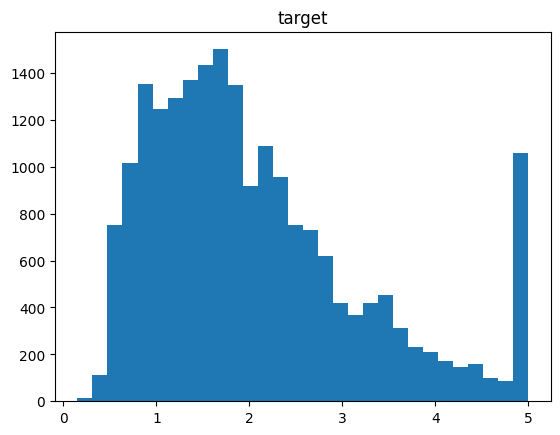

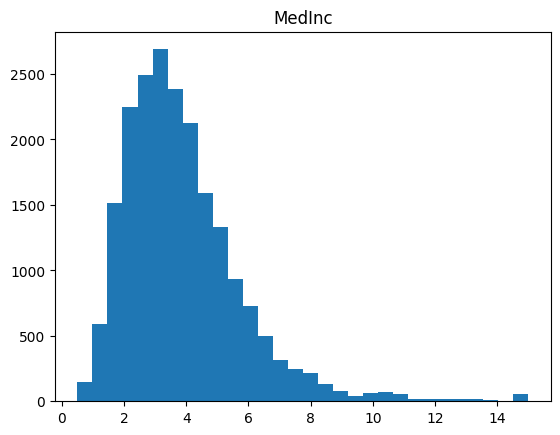

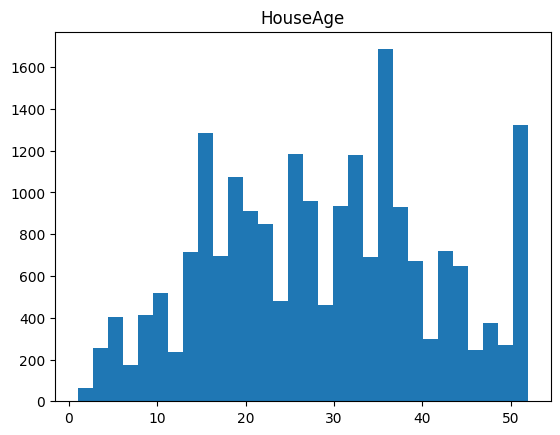

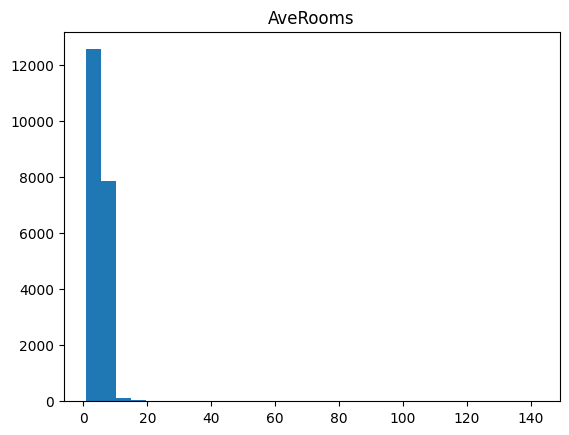

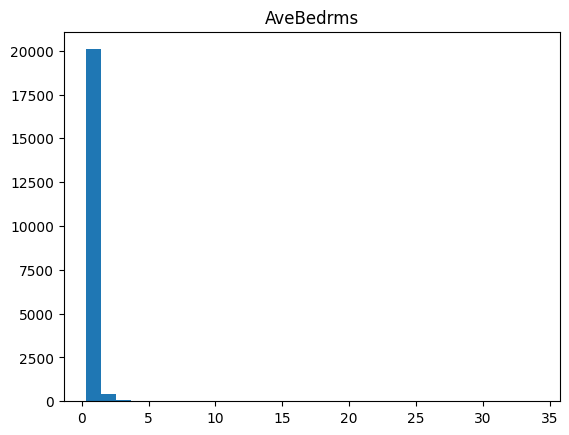

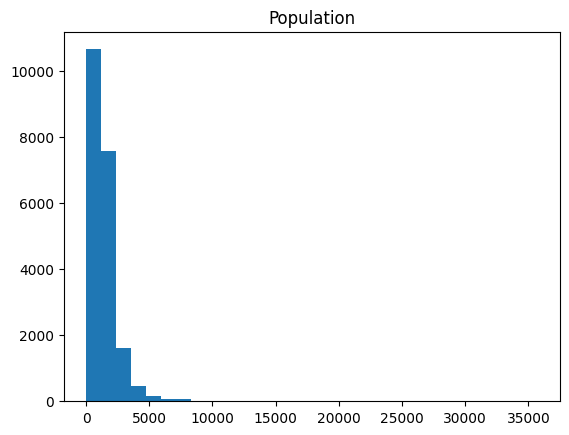

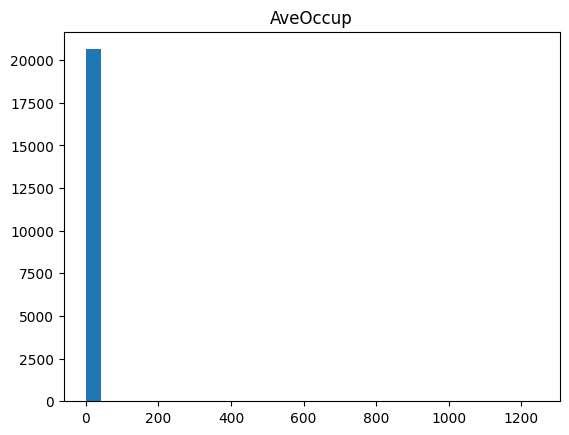

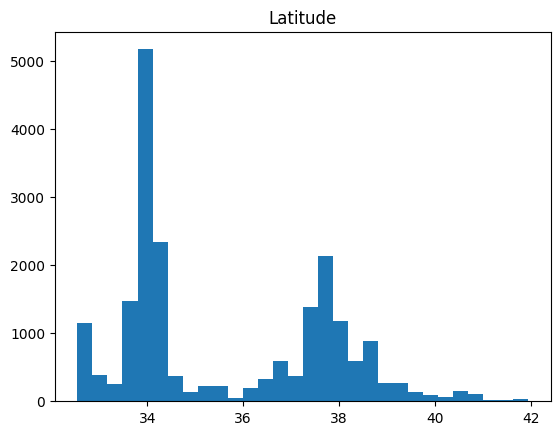

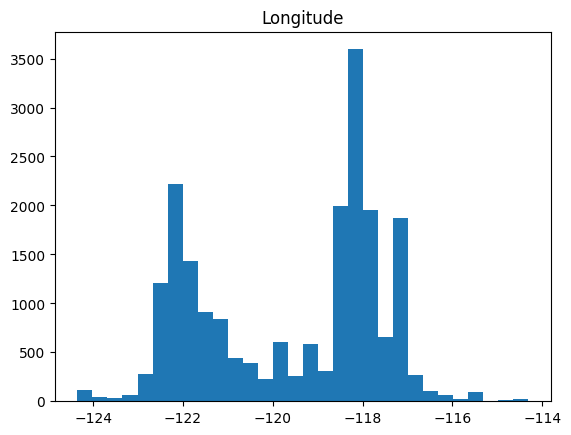

In [7]:
for colnames in df:
    if colnames != 'Unnamed: 0':
        plt.hist(df[colnames], bins = 30)
        plt.title(colnames)
        plt.show()

## 前処理実施

### 緯度と経度の情報を使って可視化する。

In [8]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

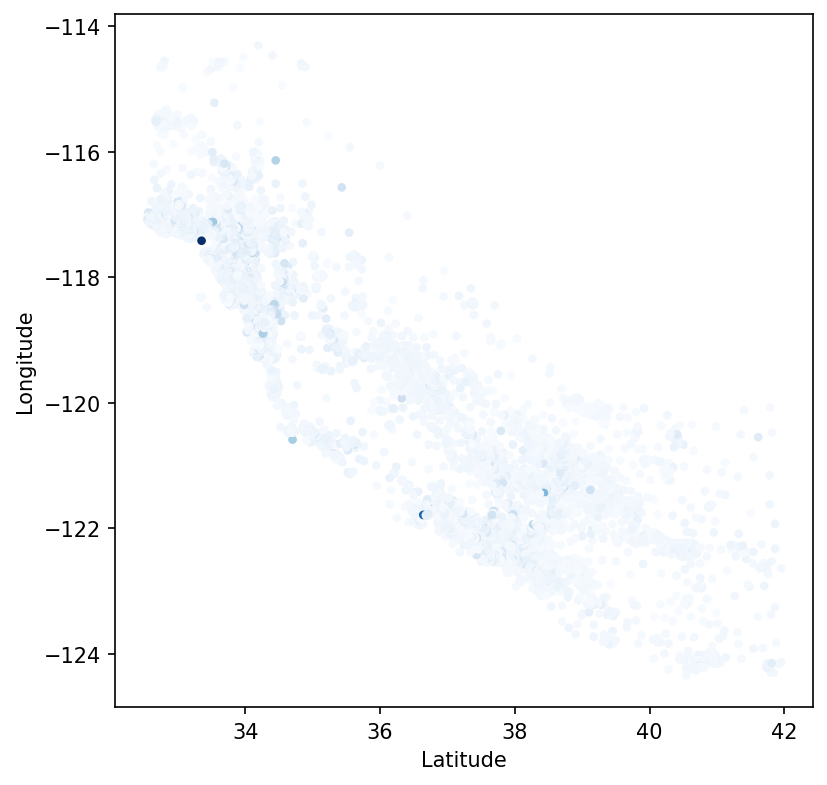

In [9]:
fig, ax = plt.subplots(1,
                       1,
                       figsize = (6,6),
                       dpi = 150)
cmap = cm.Blues
norm = mcolors.Normalize(vmin = data_exp["Population"].min(),
                            vmax = data_exp["Population"].max())
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.scatter(data_exp["Latitude"],
           data_exp["Longitude"],
           s=10,
           color=plt.cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(data_exp["Population"]))

### 前処理なし

In [10]:
data_exp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
%matplotlib inline
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_exp,
                                                    data_target,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [13]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_valid = lgb.Dataset(x_test, y_test)  

In [14]:
params = {'boosting_type':'gbdt',
          'objective': 'regression',
          'max_bin':300,
          'learning_rate':0.05,
          'num_leaves':31,
          'metric' :'mse'
         }
verbose_eval = 0

In [15]:
model = lgb.train(params = params,
                  train_set = lgb_train,
                  valid_sets = lgb_valid,
                  num_boost_round = 100,
                    callbacks=[lgb.early_stopping(stopping_rounds=10, 
                    verbose=True), # early_stopping用コールバック関数
                    lgb.log_evaluation(verbose_eval)] # コマンドライン出力用コールバック関数
                )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2153
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.072499
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.234584


In [16]:
# 訓練データにpredictさせてみる。
y_train_pred = model.predict(x_train,
                             num_iteration = model.best_iteration)

In [17]:
# テストデータの予測を行う。
y_test_pred = model.predict(x_test,
                            num_iteration = model.best_iteration)

In [18]:
y_test_pred

array([1.66188206, 2.64154316, 1.53101903, ..., 1.28556544, 2.52677337,
       1.86761869])

In [19]:
# trainデータのMSE
y_train_arrays = y_train.to_numpy()
mean_squared_error(y_train_arrays.flatten(), y_train_pred, squared = True)

c:\Users\whois\OneDrive\デスクトップ\california_housing\notebook\env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.19896867096691773

In [20]:
# testデータのMSE
y_test_arrays =y_test.to_numpy()
mean_squared_error(y_test_arrays.flatten(), y_test_pred, squared = True)

c:\Users\whois\OneDrive\デスクトップ\california_housing\notebook\env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.23458394091398727

In [21]:
# 念のためnumpyでもtestデータのmseを計算しておく。
# 0.653311…で一致。
y_test_array =y_test.to_numpy()

# レイべリングして一次元に変換。
y_test_array = y_test_array.flatten()
mse_numpy = np.mean((y_test_array- y_test_pred) ** 2)
print(mse_numpy)

0.23458394091398727


### 結果
 - 前処理 -> 決定木でのモデル作成 -> 評価
 - MSEは0.23458（前処理なし）
 - 圧倒的に精度が高い。
 - カリフォルニアとサンフランシスコの近くのフラグを作った。若干MSEは減少したが、まだやりようはありそう。

#### SHAPも求めておく。

In [22]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

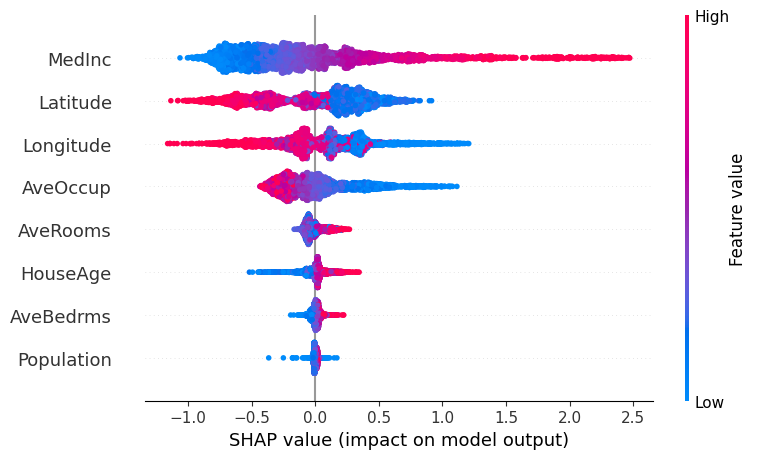

In [26]:
shap.summary_plot(shap_values, x_test)